In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/data_cleaned.csv")

In [3]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
#Segregating Variables
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [6]:
x_scaled=scaler.fit_transform(x)

In [7]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [8]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
1,0.638789,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803
2,-0.284663,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
3,0.407926,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
4,0.407926,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838


In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [10]:
trainX,testX,trainY,testY=train_test_split(x,y,random_state=56,stratify=y)

In [11]:
def Elbow(k):
    test_score=[]
    train_score=[]
    for i in k:
        clf=KNN(n_neighbors=i)
        clf.fit(trainX,trainY)
        train_predict=clf.predict(trainX)
        tp=f1_score(train_predict,trainY)
        train_score.append(tp)
        
        test_predict=clf.predict(testX)
        ttp=f1_score(test_predict,testY)
        test_score.append(ttp)
        
    
    return train_score,test_score

In [12]:
K=range(1,150)
train,test=Elbow(K)

# Visualising

Text(0.5, 1.0, 'F1 Curve')

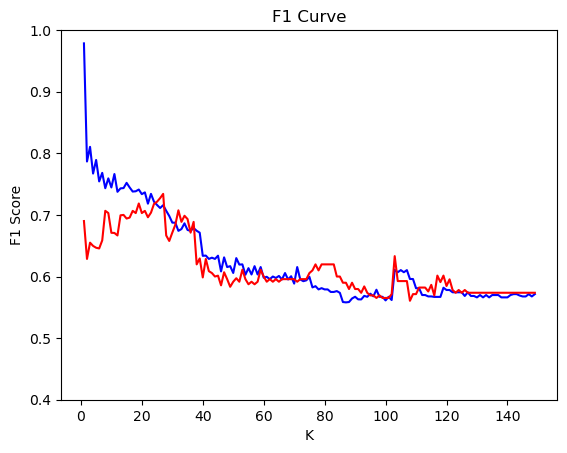

In [13]:
plt.plot(K,train,color="blue")
plt.plot(K,test,color="red")
plt.ylim(0.4,1)
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.title("F1 Curve")

# HOLD-OUT Validation

In [14]:
data=pd.read_csv("Downloads/data_cleaned.csv")

In [15]:
y_dt=data["Survived"]
x_dt=data.drop("Survived",axis=1)
TrainX,TestX,TrainY,TestY=train_test_split(x_dt,y_dt,test_size=.2,shuffle=True,random_state=51,stratify=y_dt)
trX,valX,trY,valY=train_test_split(TrainX,TrainY,test_size=0.2,shuffle=True,random_state=52,stratify=TrainY)

In [16]:
trY.value_counts()/len(trY)

0    0.616872
1    0.383128
Name: Survived, dtype: float64

In [17]:
valY.value_counts()/len(valY)

0    0.615385
1    0.384615
Name: Survived, dtype: float64

In [18]:
TestY.value_counts()/len(TestY)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

# K-fold validation

In [19]:
df=pd.read_csv("Downloads/data_Cleaned.csv")

In [20]:
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [21]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
x1=scaler.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)

In [23]:
train_X,test_x,train_y,test_y=tts(x,y,random_state=96,stratify=y)

In [24]:
from sklearn.model_selection import cross_val_score as cvs

In [25]:
#Checking consistency using cross val score

In [26]:
def Cross_Val(k):
    avg=[]
    std=[]
    for i in k:
        score=cvs(KNN(n_neighbors=i),train_X,train_y,cv=10)
        avg.append(score.mean()*100)
        std.append(score.std()*100)
    return avg, std

In [27]:
k=range(1,50)
mean,sd =Cross_Val(k)

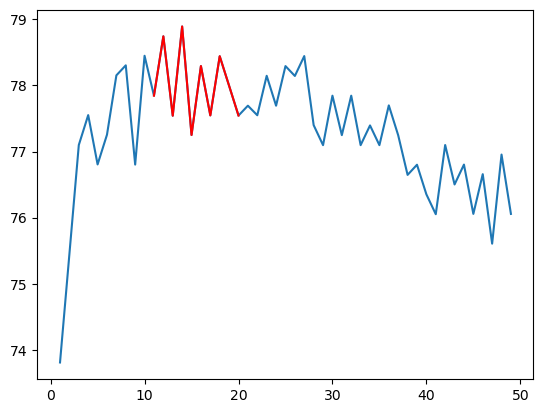

In [28]:
plt.plot(k,mean)
plt.plot(k[10:20],mean[10:20],color="red")

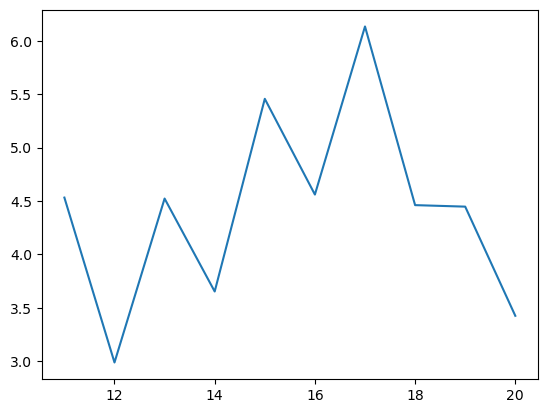

In [29]:
plt.plot(k[10:20],sd[10:20])

In [30]:
#TEST on test dataset
clf=KNN(n_neighbors=14)
clf.fit(train_X,train_y)
tp=clf.predict(test_x)
score=clf.score(test_x,test_y)
score1=clf.score(train_X,train_y)
score,score1

(0.8161434977578476, 0.811377245508982)